# Bank data analysis

The goal of project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services. Make feature engineering but also try differnet models in order to get as much accuracy as possible.

# 1.Load libraries, preprocesing

In [ ]:
options(warn=-1)
library(ggplot2)  
library(dplyr)
library(readr)
library(lattice)
library(caret)

# Import data

In [2]:
library(readr)
dataset <- read_csv("dataset_bank.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  Attrition_Flag = col_character(),
  Gender = col_character(),
  Education_Level = col_character(),
  Marital_Status = col_character(),
  Income_Category = col_character(),
  Card_Category = col_character()
)
See spec(...) for full column specifications.


Handling with outliers
Listing unique values
Months on book has negative values and unussualy high values for the max. Histogram and the boxplots show that something is not right with these values. This column is to be explored further

In [3]:
dataset<-dataset%>%
dplyr:: filter(Months_on_book>0)%>%
dplyr:: filter(Months_on_book<500)

In [4]:
dataset$CLIENTNUM<-NULL

In [5]:
dataset_char= dplyr::select_if(dataset, is.character)

# Encoding the categoral data using Label Encoder

In [6]:
dataset_char$Attrition_Flag <- ifelse(dataset_char$Attrition_Flag == "Existing Customer",0,1)
dataset_char$Gender <- ifelse(dataset_char$Gender == "M",0,1)

In [7]:
dataset_char_label<-dataset_char[1:2]

# Encoding the categoral data using One hot encoding

In [8]:
dataset_one_hot<-dataset_char[3:6]
dmy <- dummyVars(" ~ .", data = dataset_one_hot, fullRank = T)
dat_transformed <- data.frame(predict(dmy, newdata = dataset_one_hot))

# Scaling numerical data

In [9]:
dataset_numeric= dplyr::select_if(dataset, is.numeric)
# calculate the pre-process parameters from the dataset
preprocessParams <- preProcess(dataset_numeric, method=c("range"))
# summarize transform parameters
print(preprocessParams)
# transform the dataset using the parameters
transformed <- predict(preprocessParams,dataset_numeric)
# summarize the transformed dataset
summary(transformed)

Created from 10075 samples and 14 variables

Pre-processing:
  - ignored (0)
  - re-scaling to [0, 1] (14)



  Customer_Age    Dependent_count  Months_on_book   Total_Relationship_Count
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000          
 1st Qu.:0.3191   1st Qu.:0.2000   1st Qu.:0.4186   1st Qu.:0.4000          
 Median :0.4255   Median :0.4000   Median :0.5349   Median :0.6000          
 Mean   :0.4326   Mean   :0.4692   Mean   :0.5332   Mean   :0.5624          
 3rd Qu.:0.5532   3rd Qu.:0.6000   3rd Qu.:0.6279   3rd Qu.:0.8000          
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000          
 Months_Inactive_12_mon Contacts_Count_12_mon  Credit_Limit    
 Min.   :0.0000         Min.   :0.0000        Min.   :0.00000  
 1st Qu.:0.3333         1st Qu.:0.3333        1st Qu.:0.03368  
 Median :0.3333         Median :0.3333        Median :0.09395  
 Mean   :0.3901         Mean   :0.4087        Mean   :0.21729  
 3rd Qu.:0.5000         3rd Qu.:0.5000        3rd Qu.:0.29102  
 Max.   :1.0000         Max.   :1.0000        Max.   :1.00000  
 Total_Revolv

# Merging data (encoded and scaled)

In [10]:
dataset_transformed<-cbind(dataset_char_label,transformed,dat_transformed)

In [11]:
head(dataset_transformed)

Attrition_Flag,Gender,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_StatusSingle,Marital_StatusUnknown,Income_Category.40K....60K,Income_Category.60K....80K,Income_Category.80K....120K,Income_CategoryLess.than..40K,Income_CategoryUnknown,Card_CategoryGold,Card_CategoryPlatinum,Card_CategorySilver
0,0,0.4042553,0.6,0.6046512,0.8,0.1666667,0.5000000,0.34018992,0.3087008,...,0,0,0,1,0,0,0,0,0,0
0,1,0.4893617,1.0,0.7209302,1.0,0.1666667,0.3333333,0.20611167,0.3432658,...,1,0,0,0,0,1,0,0,0,0
0,0,0.5319149,0.6,0.5348837,0.6,0.1666667,0.0000000,0.05984999,0.0000000,...,0,0,0,0,1,0,0,0,0,0
0,1,0.2978723,0.8,0.4883721,0.4,0.6666667,0.1666667,0.05667565,1.0000000,...,0,1,0,0,0,1,0,0,0,0
0,0,0.2978723,0.6,0.1860465,0.8,0.1666667,0.0000000,0.09909093,0.0000000,...,0,0,0,1,0,0,0,0,0,0
0,0,0.3829787,0.4,0.5348837,0.4,0.1666667,0.3333333,0.07774724,0.4954311,...,0,0,1,0,0,0,0,0,0,0


In [12]:
str(dataset_transformed)

'data.frame':	10075 obs. of  33 variables:
 $ Attrition_Flag               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Gender                       : num  0 1 0 1 0 0 0 0 0 0 ...
 $ Customer_Age                 : num  0.404 0.489 0.532 0.298 0.298 ...
 $ Dependent_count              : num  0.6 1 0.6 0.8 0.6 0.4 0.8 0 0.6 0.4 ...
 $ Months_on_book               : num  0.605 0.721 0.535 0.488 0.186 ...
 $ Total_Relationship_Count     : num  0.8 1 0.6 0.4 0.8 0.4 1 0.2 0.8 1 ...
 $ Months_Inactive_12_mon       : num  0.167 0.167 0.167 0.667 0.167 ...
 $ Contacts_Count_12_mon        : num  0.5 0.333 0 0.167 0 ...
 $ Credit_Limit                 : num  0.3402 0.2061 0.0598 0.0567 0.0991 ...
 $ Total_Revolving_Bal          : num  0.309 0.343 0 1 0 ...
 $ Avg_Open_To_Buy              : num  0.3451 0.2141 0.0989 0.023 0.1366 ...
 $ Total_Amt_Chng_Q4_Q1         : num  0.393 0.454 0.764 0.414 0.64 ...
 $ Total_Trans_Amt              : num  0.0353 0.0435 0.0766 0.0368 0.017 ...
 $ Total_Trans_Ct           

In [13]:
dataset_transformed$Attrition_Flag<-as.factor(dataset_transformed$Attrition_Flag)

# 2.Testing diffrent models

In our approach to machine learning in R environment, we used seven different supervised learning algorithms: C5.0 algorithm (C5.0 ),Stochastic Gradient Boosting(GBM),Random Forest(RF),K-Nearest Neighbors (KNN), Classification and regression trees (CART), Support Vector Machine (SVM) and Logistic regression (LR).The algorithms were chosen for their diversity of representation and learning style.The main evaluation metric is Accuracy and Kappa because they are easy to interpret. In order to get more robust results with this approach we also used repeated cross validation with 10 folds and 3 repeats, which is a common standard configuration for comparing models. 

In [14]:
library(caret)
library(caretEnsemble)
library(mlbench)
dataset <- dataset_transformed
# define an 80%/20% train/test split of the dataset
validation_index <- createDataPartition(dataset_transformed$Attrition_Flag, p=0.80, list=FALSE)
validation <- dataset_transformed[-validation_index,]
training <- dataset_transformed[validation_index,]
trainControl <- trainControl(method="repeatedcv", number=10, repeats=3)
seed <- 7
metric <- "Accuracy"


Attaching package: 'caretEnsemble'

The following object is masked from 'package:ggplot2':

    autoplot



# 2.1 C5.0 Algorithm

In [15]:
set.seed(seed)
fit.c50 <- train(Attrition_Flag~., data=dataset_transformed, method="C5.0", metric=metric,
trControl=trainControl)

In [40]:
fit.c50

C5.0 

10075 samples
   32 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 9067, 9067, 9067, 9068, 9067, 9068, ... 
Resampling results across tuning parameters:

  model  winnow  trials  Accuracy   Kappa    
  rules  FALSE    1      0.9496770  0.8084200
  rules  FALSE   10      0.9691975  0.8846497
  rules  FALSE   20      0.9707856  0.8902905
  rules   TRUE    1      0.9501397  0.8101788
  rules   TRUE   10      0.9683710  0.8820831
  rules   TRUE   20      0.9698934  0.8870903
  tree   FALSE    1      0.9446474  0.7908789
  tree   FALSE   10      0.9678403  0.8772988
  tree   FALSE   20      0.9699579  0.8854543
  tree    TRUE    1      0.9457721  0.7958880
  tree    TRUE   10      0.9663194  0.8715377
  tree    TRUE   20      0.9687345  0.8808436

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were trials = 20, model = rules and
 winnow 

In [39]:
predictions <- predict(fit.c50, newdata=validation)
confusionMatrix(predictions, validation$Attrition_Flag)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1690    0
         1    2  322
                                          
               Accuracy : 0.999           
                 95% CI : (0.9964, 0.9999)
    No Information Rate : 0.8401          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9963          
                                          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 0.9988          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9938          
             Prevalence : 0.8401          
         Detection Rate : 0.8391          
   Detection Prevalence : 0.8391          
      Balanced Accuracy : 0.9994          
                                          
       'Positive' Class : 0               
                        

# 2.2 Stochastic Gradient Boosting

In [41]:
set.seed(seed)
fit.gbm <- train(Attrition_Flag~., data=dataset_transformed, method="gbm", metric="Accuracy",
trControl=trainControl, verbose=FALSE)

In [42]:
fit.gbm

Stochastic Gradient Boosting 

10075 samples
   32 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 9067, 9067, 9067, 9068, 9067, 9068, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
  1                   50      0.8989230  0.5189541
  1                  100      0.9209911  0.6521687
  1                  150      0.9303216  0.7018687
  2                   50      0.9267485  0.6854615
  2                  100      0.9507355  0.8016938
  2                  150      0.9585439  0.8367797
  3                   50      0.9431255  0.7675181
  3                  100      0.9587423  0.8379882
  3                  150      0.9654257  0.8661343

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
Accuracy was used to select the optimal model using the largest value.
The final

In [43]:
predictions <- predict(fit.gbm, newdata=validation)
confusionMatrix(predictions, validation$Attrition_Flag)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1677   47
         1   15  275
                                          
               Accuracy : 0.9692          
                 95% CI : (0.9607, 0.9763)
    No Information Rate : 0.8401          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8806          
                                          
 Mcnemar's Test P-Value : 8.251e-05       
                                          
            Sensitivity : 0.9911          
            Specificity : 0.8540          
         Pos Pred Value : 0.9727          
         Neg Pred Value : 0.9483          
             Prevalence : 0.8401          
         Detection Rate : 0.8327          
   Detection Prevalence : 0.8560          
      Balanced Accuracy : 0.9226          
                                          
       'Positive' Class : 0               
                        

# 2.3 Random Forest

In [44]:
fit.rf <- train(Attrition_Flag~., data=dataset_transformed, method="rf", trControl=trainControl)

In [45]:
fit.rf

Random Forest 

10075 samples
   32 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 9066, 9067, 9067, 9067, 9068, 9068, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9234406  0.6574254
  17    0.9656900  0.8689609
  32    0.9626463  0.8580475

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 17.

In [46]:
predictions <- predict(fit.rf, newdata=validation)
confusionMatrix(predictions, validation$Attrition_Flag)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1692    0
         1    0  322
                                     
               Accuracy : 1          
                 95% CI : (0.9982, 1)
    No Information Rate : 0.8401     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.8401     
         Detection Rate : 0.8401     
   Detection Prevalence : 0.8401     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

# 2.4 КNN

In [47]:
fit.knn <- train(Attrition_Flag~., data=dataset_transformed, method="knn", trControl=trainControl)

In [48]:
fit.knn

k-Nearest Neighbors 

10075 samples
   32 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 9067, 9068, 9068, 9068, 9067, 9068, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.8591571  0.3049829
  7  0.8612743  0.2879318
  9  0.8604791  0.2621685

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 7.

In [49]:
predictions <- predict(fit.knn, newdata=validation)
confusionMatrix(predictions, validation$Attrition_Flag)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1670  214
         1   22  108
                                         
               Accuracy : 0.8828         
                 95% CI : (0.868, 0.8966)
    No Information Rate : 0.8401         
    P-Value [Acc > NIR] : 3.264e-08      
                                         
                  Kappa : 0.425          
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9870         
            Specificity : 0.3354         
         Pos Pred Value : 0.8864         
         Neg Pred Value : 0.8308         
             Prevalence : 0.8401         
         Detection Rate : 0.8292         
   Detection Prevalence : 0.9355         
      Balanced Accuracy : 0.6612         
                                         
       'Positive' Class : 0              
                                         

In [42]:
grid <- expand.grid(.k=seq(1,20,by=1))
fit.knn_refit <- train(Attrition_Flag~., data=dataset_transformed, method="knn", metric=metric, tuneGrid=grid,
preProc=c("BoxCox"), trControl=trainControl)
print(fit.knn_refit)

k-Nearest Neighbors 

10075 samples
   32 predictor
    2 classes: '0', '1' 

Pre-processing:  (None) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 9068, 9068, 9067, 9067, 9068, 9067, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.8334093  0.3457974
   2  0.8207962  0.2980950
   3  0.8567350  0.3444800
   4  0.8531795  0.3216672
   5  0.8602508  0.3105068
   6  0.8576456  0.2970637
   7  0.8613675  0.2928376
   8  0.8588447  0.2759395
   9  0.8612845  0.2703355
  10  0.8590507  0.2518590
  11  0.8592583  0.2423556
  12  0.8578529  0.2267564
  13  0.8576861  0.2183031
  14  0.8561972  0.2030332
  15  0.8552452  0.1908437
  16  0.8535492  0.1771622
  17  0.8540045  0.1745099
  18  0.8532605  0.1656792
  19  0.8528057  0.1566262
  20  0.8518548  0.1472542

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 7.


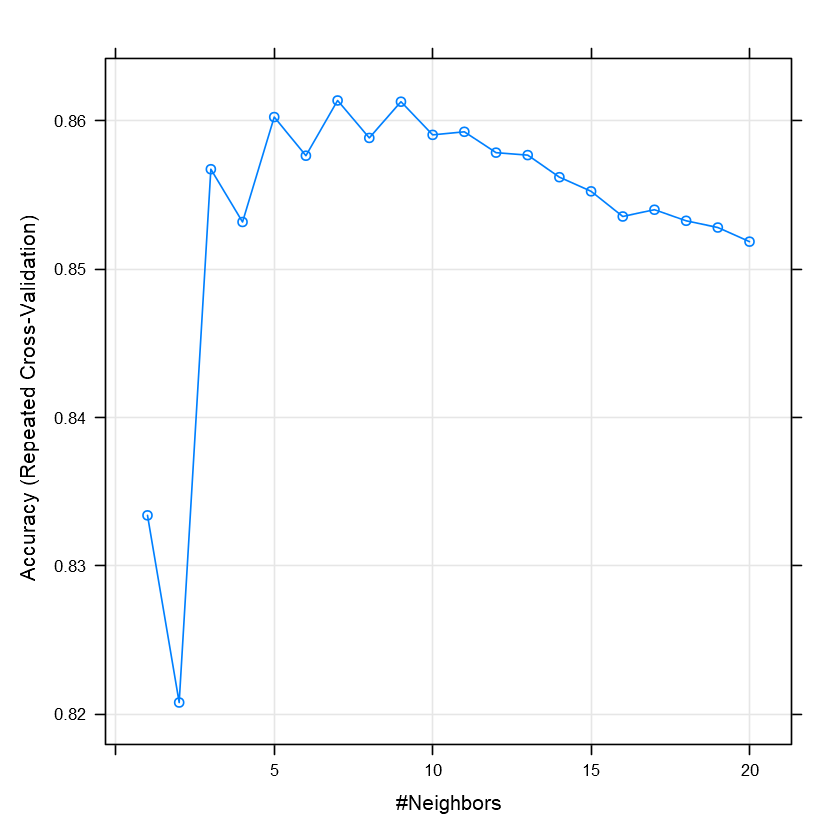

In [43]:
plot(fit.knn_refit)

# 2.5 CART

In [15]:
fit.cart <- train(Attrition_Flag~., data=dataset_transformed, method="rpart", trControl=trainControl)

In [16]:
fit.cart

CART 

10075 samples
   32 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 9067, 9067, 9068, 9068, 9067, 9067, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.03848541  0.9048474  0.6242659
  0.07324643  0.8948231  0.5617035
  0.16635630  0.8633570  0.2594586

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.03848541.

In [17]:
predictions <- predict(fit.cart, newdata=validation)
confusionMatrix(predictions, validation$Attrition_Flag)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1626  124
         1   66  198
                                         
               Accuracy : 0.9057         
                 95% CI : (0.892, 0.9181)
    No Information Rate : 0.8401         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6212         
                                         
 Mcnemar's Test P-Value : 3.546e-05      
                                         
            Sensitivity : 0.9610         
            Specificity : 0.6149         
         Pos Pred Value : 0.9291         
         Neg Pred Value : 0.7500         
             Prevalence : 0.8401         
         Detection Rate : 0.8073         
   Detection Prevalence : 0.8689         
      Balanced Accuracy : 0.7879         
                                         
       'Positive' Class : 0              
                                         

# 2.6 SVM

In [53]:
fit.svm <- train(Attrition_Flag~., data=dataset_transformed, method="svmRadial", trControl=trainControl)

In [54]:
fit.svm

Support Vector Machines with Radial Basis Function Kernel 

10075 samples
   32 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 9068, 9068, 9068, 9067, 9067, 9067, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.9062689  0.5789638
  0.50  0.9138785  0.6271164
  1.00  0.9225472  0.6738860

Tuning parameter 'sigma' was held constant at a value of 0.01974523
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.01974523 and C = 1.

In [55]:
predictions <- predict(fit.svm, newdata=validation)
confusionMatrix(predictions, validation$Attrition_Flag)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1665  105
         1   27  217
                                          
               Accuracy : 0.9345          
                 95% CI : (0.9228, 0.9449)
    No Information Rate : 0.8401          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7295          
                                          
 Mcnemar's Test P-Value : 2.056e-11       
                                          
            Sensitivity : 0.9840          
            Specificity : 0.6739          
         Pos Pred Value : 0.9407          
         Neg Pred Value : 0.8893          
             Prevalence : 0.8401          
         Detection Rate : 0.8267          
   Detection Prevalence : 0.8788          
      Balanced Accuracy : 0.8290          
                                          
       'Positive' Class : 0               
                        

# 2.6.1 Tuninig

Support Vector Machines with Radial Basis Function Kernel 

10075 samples
   32 predictor
    2 classes: '0', '1' 

Pre-processing:  (None) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 9068, 9068, 9068, 9068, 9067, 9067, ... 
Resampling results across tuning parameters:

  sigma  C   Accuracy   Kappa    
  0.025   1  0.9219570  0.6715545
  0.025   2  0.9272091  0.7012193
  0.025   3  0.9274987  0.7058685
  0.025   4  0.9282016  0.7114851
  0.025   5  0.9288633  0.7156902
  0.025   6  0.9291532  0.7179899
  0.025   7  0.9288636  0.7173944
  0.025   8  0.9289878  0.7184637
  0.025   9  0.9286978  0.7178099
  0.025  10  0.9285738  0.7180760
  0.050   1  0.9183169  0.6542449
  0.050   2  0.9242311  0.6899407
  0.050   3  0.9244790  0.6941094
  0.050   4  0.9247268  0.6973311
  0.050   5  0.9241064  0.6967624
  0.050   6  0.9233619  0.6946779
  0.050   7  0.9224934  0.6921745
  0.050   8  0.9218317  0.6903829
  0.050   9  0.9212527  0.6886901
  0.050  1

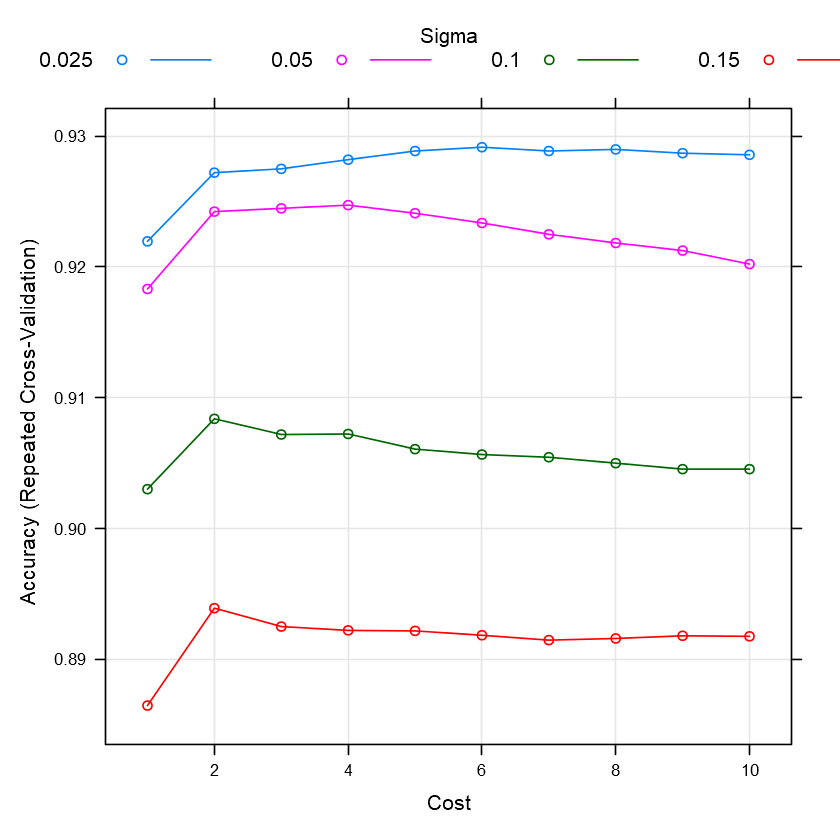

In [19]:
grid <- expand.grid(.sigma=c(0.025, 0.05, 0.1, 0.15), .C=seq(1, 10, by=1))
fit.svm_refit <- train(Attrition_Flag~., data=dataset_transformed, method="svmRadial", metric=metric, tuneGrid=grid,
preProc=c("BoxCox"), trControl=trainControl)
print(fit.svm_refit)
plot(fit.svm_refit)

In [21]:
predictions <- predict(fit.svm_refit, newdata=validation)
confusionMatrix(predictions, validation$Attrition_Flag)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1671   53
         1   21  269
                                         
               Accuracy : 0.9633         
                 95% CI : (0.9541, 0.971)
    No Information Rate : 0.8401         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8575         
                                         
 Mcnemar's Test P-Value : 0.0003137      
                                         
            Sensitivity : 0.9876         
            Specificity : 0.8354         
         Pos Pred Value : 0.9693         
         Neg Pred Value : 0.9276         
             Prevalence : 0.8401         
         Detection Rate : 0.8297         
   Detection Prevalence : 0.8560         
      Balanced Accuracy : 0.9115         
                                         
       'Positive' Class : 0              
                                         

# 2.7 Logistic Regression

In [33]:
fit.glm <- train(Attrition_Flag~., data=dataset_transformed, method="glm", trControl=trainControl)

In [34]:
fit.glm

Generalized Linear Model 

10075 samples
   32 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 9067, 9067, 9068, 9068, 9068, 9067, ... 
Resampling results:

  Accuracy   Kappa    
  0.9046157  0.6082591


In [35]:
predictions <- predict(fit.glm, newdata=validation)
confusionMatrix(predictions, validation$Attrition_Flag)


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1629  125
         1   63  197
                                         
               Accuracy : 0.9067         
                 95% CI : (0.8931, 0.919)
    No Information Rate : 0.8401         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6231         
                                         
 Mcnemar's Test P-Value : 8.632e-06      
                                         
            Sensitivity : 0.9628         
            Specificity : 0.6118         
         Pos Pred Value : 0.9287         
         Neg Pred Value : 0.7577         
             Prevalence : 0.8401         
         Detection Rate : 0.8088         
   Detection Prevalence : 0.8709         
      Balanced Accuracy : 0.7873         
                                         
       'Positive' Class : 0              
                                         

# 2.7 Summarize results and visualisation

In [46]:
boostingResults <- resamples(list(C5.0=fit.c50, GBM=fit.gbm,RF=fit.rf,KNN=fit.knn,KNN_refit=fit.knn_refit,CART=fit.cart,SVM=fit.svm,SVM_Refit=fit.svm_refit,LR=fit.glm))
summary(boostingResults)


Call:
summary.resamples(object = boostingResults)

Models: C5.0, GBM, RF, KNN, KNN_refit, CART, SVM, SVM_Refit, LR 
Number of resamples: 30 

Accuracy 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
C5.0      0.9612711 0.9667329 0.9712302 0.9707856 0.9739583 0.9821251    0
GBM       0.9553128 0.9613095 0.9652605 0.9654257 0.9692460 0.9751984    0
RF        0.9523810 0.9625405 0.9652605 0.9656900 0.9692384 0.9762141    0
KNN       0.8530288 0.8574618 0.8605461 0.8612743 0.8656902 0.8728898    0
KNN_refit 0.8520357 0.8578166 0.8600496 0.8613675 0.8642341 0.8758689    6
CART      0.8848064 0.8983135 0.9072421 0.9064666 0.9136048 0.9246032    0
SVM       0.9056604 0.9168942 0.9221230 0.9225472 0.9294935 0.9355159    0
SVM_Refit 0.9185700 0.9235353 0.9305211 0.9291532 0.9340118 0.9384921    6
LR        0.8907646 0.8990327 0.9037698 0.9046157 0.9111446 0.9206349    0

Kappa 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
C5.0      0.85

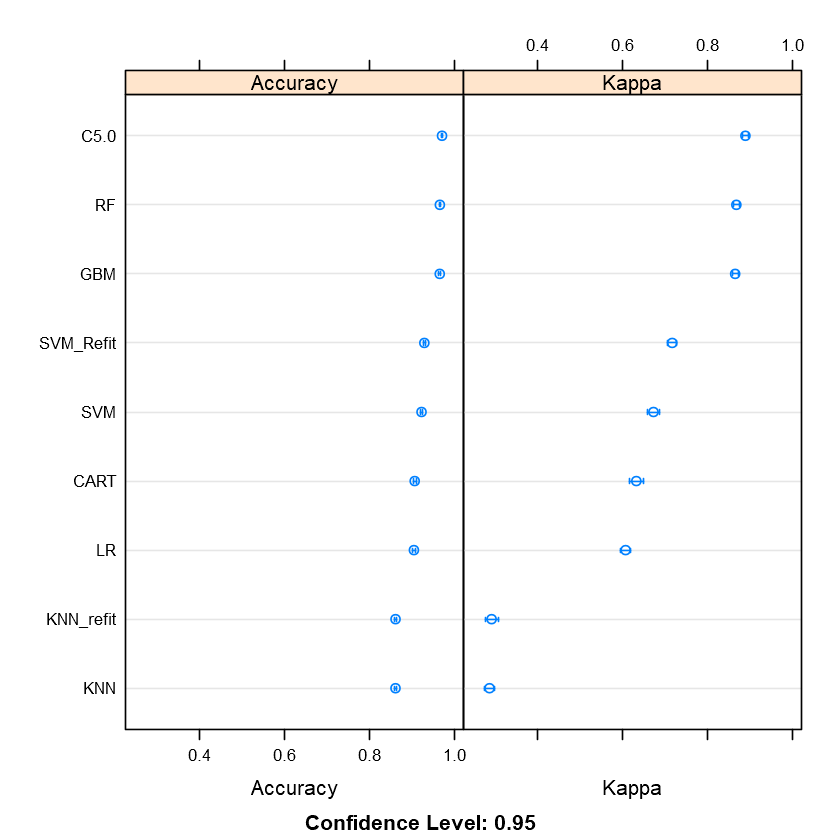

In [47]:
dotplot(boostingResults)

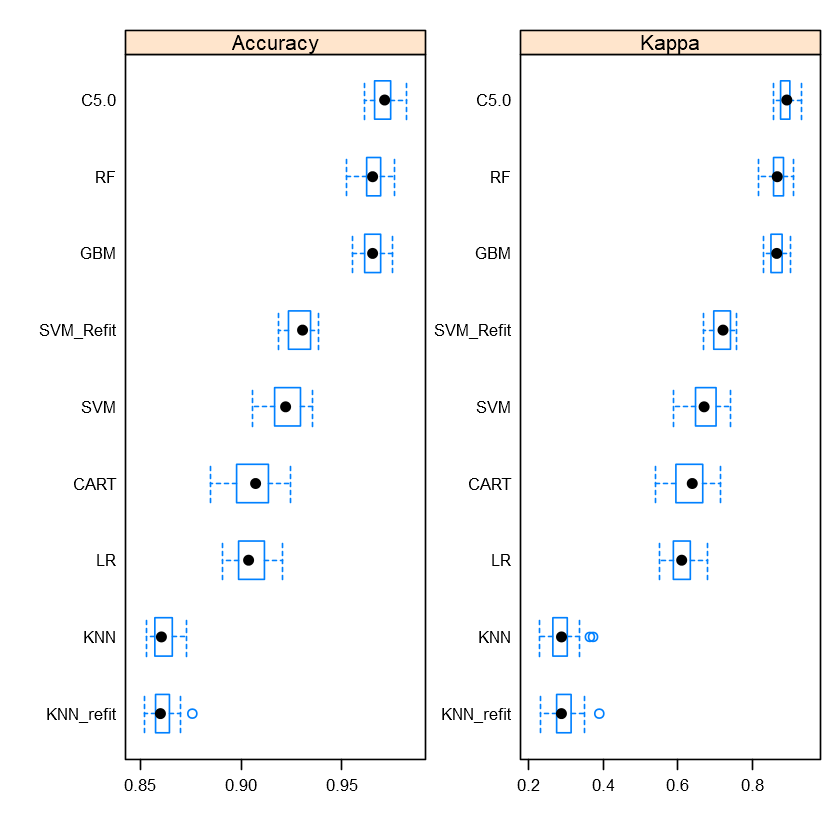

In [48]:
# box and whisker plots to compare models
scales <- list(x=list(relation="free"), y=list(relation="free"))
bwplot(boostingResults, scales=scales)

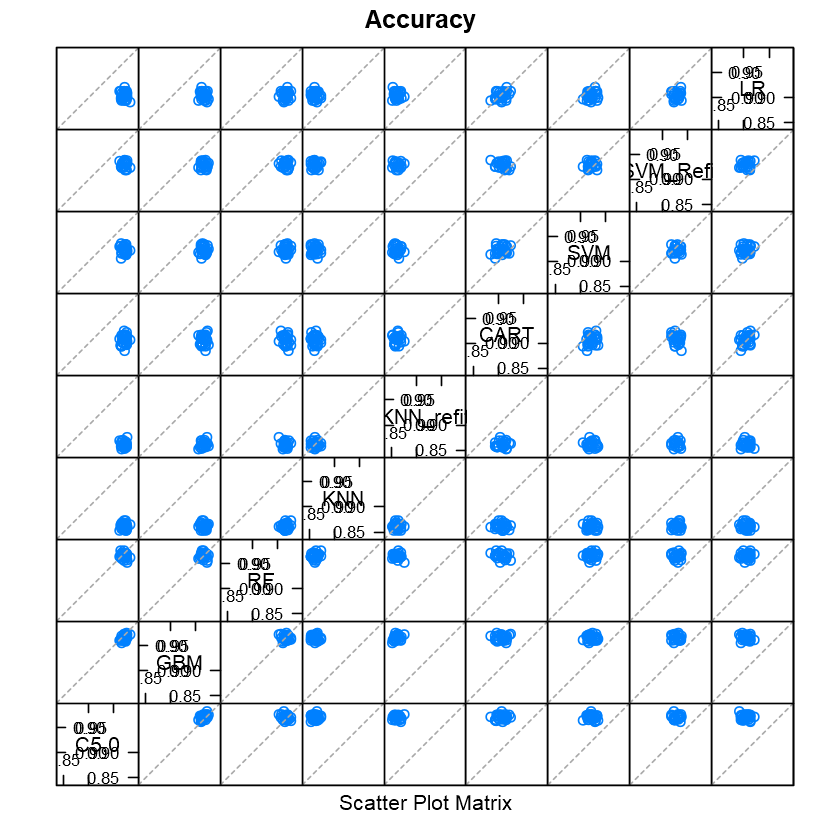

In [50]:
splom(boostingResults)

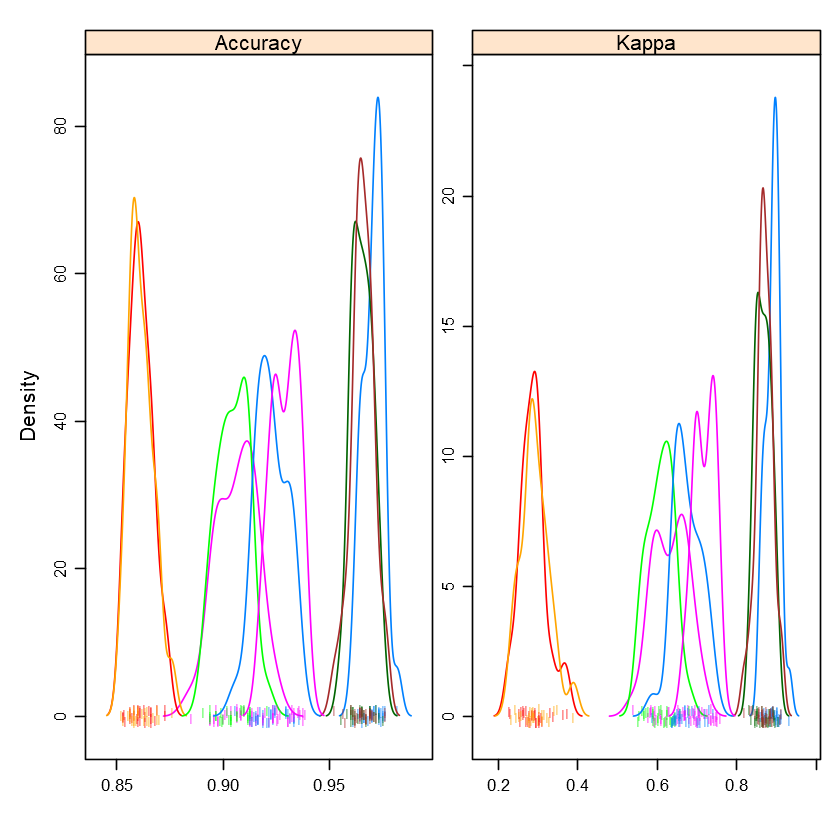

In [51]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
densityplot(boostingResults, scales=scales, pch = "|")


# 2.8 Saving the best model

In [ ]:
saveRDS(fit.c50, "./fit.c50.rds")